In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [21]:
# win/loss function - based on two arbitrary "skill" values for each player (simplified compared to real world, 
# but alright as an)
# This is the current game function, as it seems to give an alright distribution of win/loss while still
# including the win/loss present in real games

def game(skill1, skill2):
    return skill1 - skill2 + np.random.normal(0.0, (1 - max(skill1, skill2)) * 1)

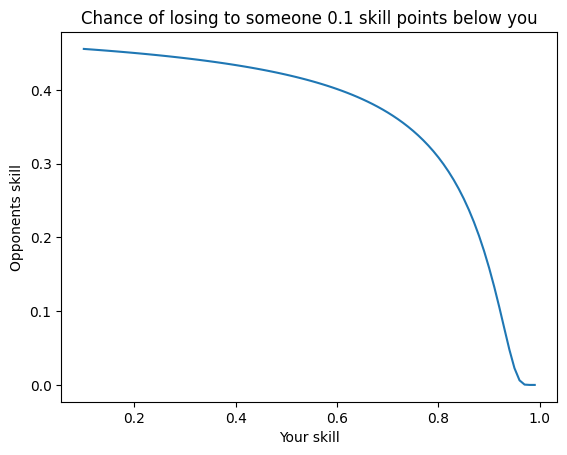

In [22]:
# Graph of chances of losing to someone 0.1 skill points below you - almost a 50/50 at 0.1 skill, but very close 
# to a 100% chance for the better player at .99

loss_probabilities = []
for skill in np.arange(0.1, 1, 0.01):
    loss_probabilities.append(scipy.stats.norm(0.0, (1 - skill) * 1).cdf(-0.1))
plt.title("Chance of losing to someone 0.1 skill points below you")
plt.xlabel("Your skill")
plt.ylabel("Opponents skill")
plt.plot(np.arange(0.1, 1, 0.01), loss_probabilities)

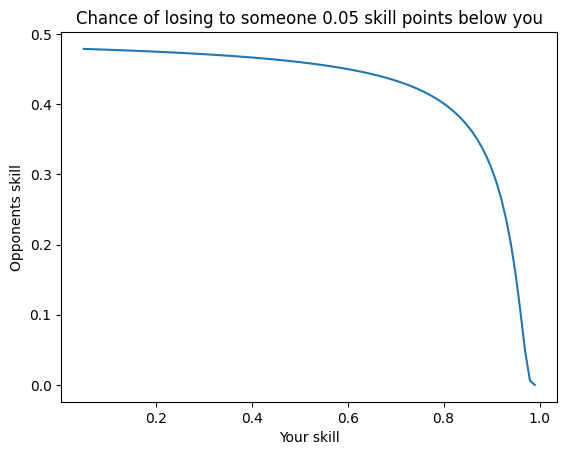

In [23]:
# Graph of chances of losing to someone 0.05 skill points below you

loss_probabilities = []
for skill in np.arange(0.05, 1, 0.01):
    loss_probabilities.append(scipy.stats.norm(0.0, (1 - skill) * 1).cdf(-0.05))
plt.title("Chance of losing to someone 0.05 skill points below you")
plt.xlabel("Your skill")
plt.ylabel("Opponents skill")
plt.plot(np.arange(0.05, 1, 0.01), loss_probabilities)